# Query for icSrc Sources Results in  OGA

 work with Weakly_2022_39
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/01/06
- update : 2023/01/06


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_01/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.1.0/eups 	setup
summit_utils          LOCAL:/home/d/dagoret/repos/repos_w_2023_01/summit_utils 	setup


In [2]:
! eups list -s lsst_distrib

   g0b29ad24fb+a10408d0bf 	current w_2022_39 setup


In [3]:
import lsst.daf.butler as dafButler
import lsst.summit.utils.butlerUtils as butlerUtils

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.io import fits

import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [27]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


In [25]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [28]:
transform = AsinhStretch() + PercentileInterval(99.)

In [5]:
#repo =  "/sdf/group/rubin/repo/main"
repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

## Give the collection

In [6]:
my_collection = "u/dagoret/BPS_test"

In [7]:
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

## Config

In [8]:
# path index for each month
#DATE="20211103"
#filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
#filterdispersername = "FELH0600~holo4_003"

- icSrc_schema
- icExp  
- icExpBackground  
- icSrc

In [9]:
datasetRefs = registry.queryDatasets(datasetType='icSrc_schema', collections=my_collection, where= "instrument='LATISS'")
#icSrc_schema = butler.get('icSrc_schema')

## icExp

In [10]:
datasetRefs = registry.queryDatasets(datasetType='icExp', collections=my_collection, where= "instrument='LATISS'")

In [11]:
all_ref_for_icSrc = []
all_dataId = []
all_icExp  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExp ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExp = butler.get('icExp', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExp.append(icExp)
    if i > 5:
        break

========================datasetType = icExp ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2022121200630}
visit...................: 2022121200630
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 630, 'detector': 0}
========================datasetType = icExp ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2022121200579}
visit...................: 2022121200579
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 579, 'detector': 0}
========================datasetType = icExp ============================================
fullId...........

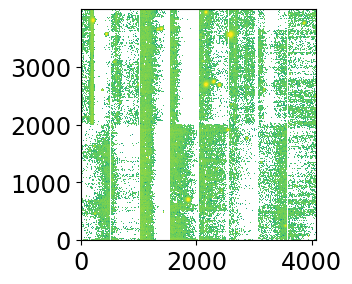

In [33]:
plt.imshow(icExp.getImage().array,origin="lower",norm=LogNorm(vmin=0,vmax=60))

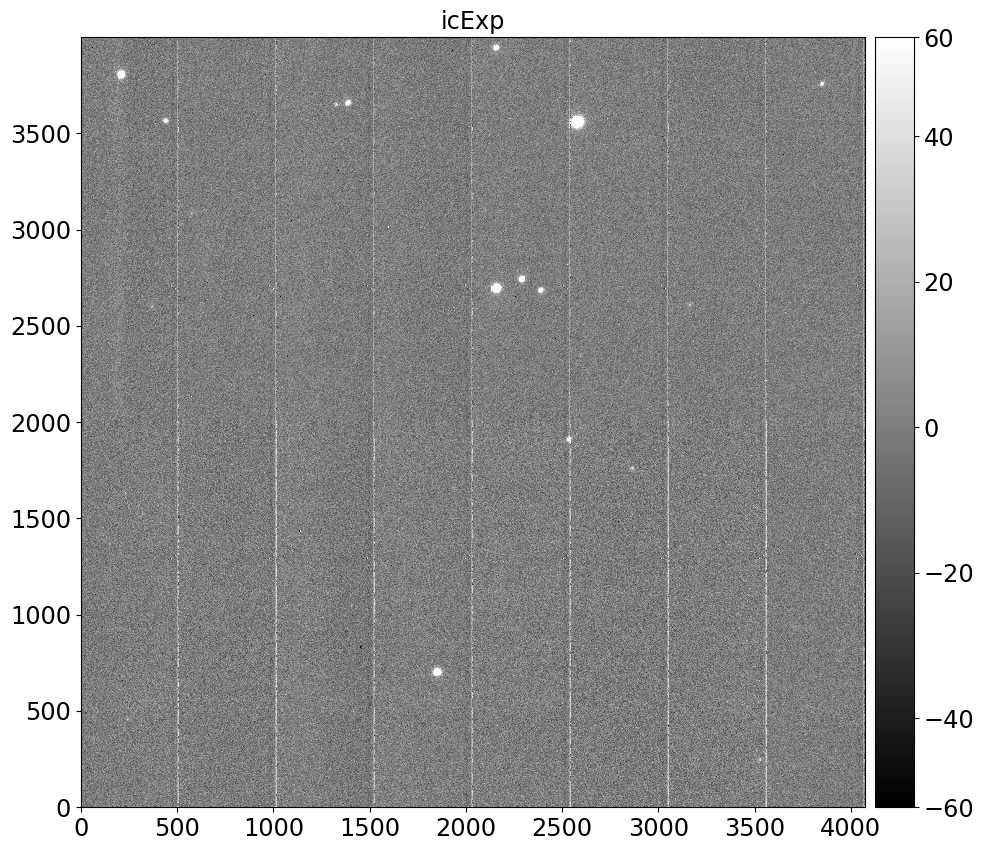

In [29]:
    
fig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
the_title = f"icExp"
afw_display.mtv(icExp.getImage(),title=the_title)

## icExpBackground

In [34]:
datasetRefs = registry.queryDatasets(datasetType='icExpBackground', collections=my_collection, where= "instrument='LATISS'")

In [14]:
all_ref_for_icExpBg  = []
all_dataId = []
all_icExpBg  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExpBackground ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExpBg = butler.get('icExpBackground', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icExpBg.append(icExpBg) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExpBg.append(icExpBg)
    if i > 5:
        break

========================datasetType = icExpBackground ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2022121200575}
visit...................: 2022121200575
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 575, 'detector': 0}
========================datasetType = icExpBackground ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2022121200642}
visit...................: 2022121200642
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 642, 'detector': 0}
========================datasetType = icExpBackground ================================

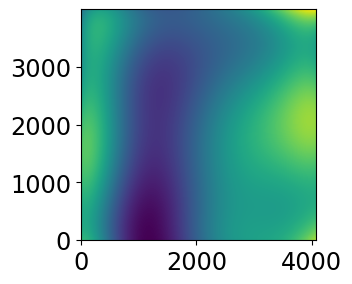

In [35]:
plt.imshow(icExpBg.getImage().array,origin="lower")

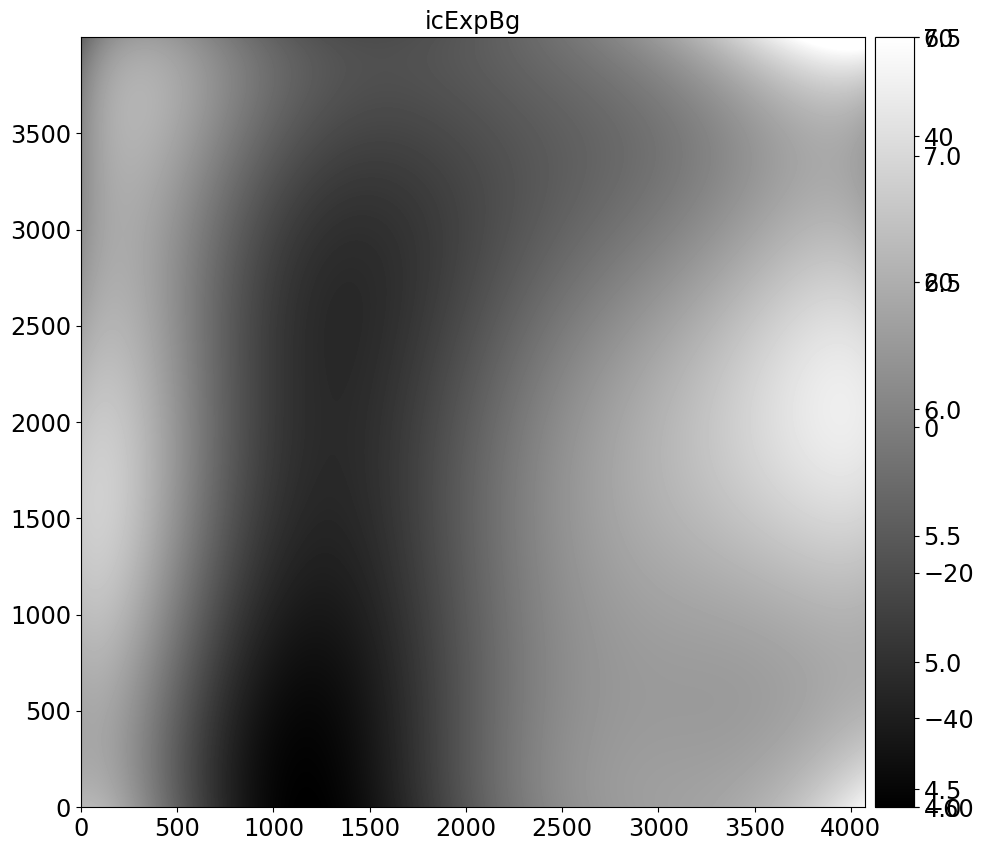

In [36]:
ig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
the_title = f"icExpBg"
afw_display.mtv(icExpBg.getImage(),title=the_title)

## icSrc

In [16]:
datasetRefs = registry.queryDatasets(datasetType='icSrc', collections=my_collection, where= "instrument='LATISS'")

In [17]:
datasetRefs.any() 

True

In [18]:
all_ref_for_icSrc = []
all_dataId = []
all_icSrc = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icSrc ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icSrc = butler.get('icSrc', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icSrc.append(icSrc) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icSrc.append(icSrc)
    if i > 5:
        break

========================datasetType = icSrc ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2022121200448}
visit...................: 2022121200448
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 448, 'detector': 0}
========================datasetType = icSrc ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2022121200660}
visit...................: 2022121200660
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 660, 'detector': 0}
========================datasetType = icSrc ============================================
fullId...........

In [19]:
table_sources = icSrc.asAstropy()
table_sources

id,coord_ra,coord_dec,parent,calib_psf_candidate,calib_psf_used,calib_psf_reserved,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,slot_Centroid_xErr,base_SdssCentroid_yErr,slot_Centroid_yErr,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_PsfFlux_flag_badCentroid_edge,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_notAtMaximum,slot_Centroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_CircularApertureFlux_flag_badCentroid_resetToPeak,base_GaussianFlux_flag_badCentroid_resetToPeak,base_PsfFlux_flag_badCentroid_resetToPeak,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_resetToPeak,slot_Centroid_flag_resetToPeak,base_SdssCentroid_flag_badError,base_CircularApertureFlux_flag_badCentroid_badError,base_GaussianFlux_flag_badCentroid_badError,base_PsfFlux_flag_badCentroid_badError,ext_shapeHSM_HsmSourceMoments_flag_badCentroid_badError,slot_Centroid_flag_badError,base_FPPosition_x,base_FPPosition_y,base_FPPosition_flag,base_FPPosition_missingDetector_flag,base_Jacobian_value,base_Jacobian_flag,ext_shapeHSM_HsmSourceMoments_x,slot_Shape_x,ext_shapeHSM_HsmSourceMoments_y,slot_Shape_y,ext_shapeHSM_HsmSourceMoments_xx,slot_Shape_xx,ext_shapeHSM_HsmSourceMoments_yy,slot_Shape_yy,ext_shapeHSM_HsmSourceMoments_xy,slot_Shape_xy,ext_shapeHSM_HsmSourceMoments_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,ext_shapeHSM_HsmSourceMoments_flag_no_pixels,base_GaussianFlux_flag_badShape_no_pixels,slot_Shape_flag_no_pixels,ext_shapeHSM_HsmSourceMoments_flag_not_contained,base_GaussianFlux_flag_badShape_not_contained,slot_Shape_flag_not_contained,ext_shapeHSM_HsmSourceMoments_flag_parent_source,base_GaussianFlux_flag_badShape_parent_source,slot_Shape_flag_parent_source,ext_shapeHSM_HsmSourceMoments_flag_galsim,base_GaussianFlux_flag_badShape_galsim,slot_Shape_flag_galsim,ext_shapeHSM_HsmSourceMoments_flag_edge,base_GaussianFlux_flag_badShape_edge,slot_Shape_flag_edge,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_f

## src

In [20]:
datasetRefs = butler.registry.queryDatasets(datasetType='src', collections=my_collection, where= "instrument='LATISS'")

In [21]:
all_ref_for_src = []
all_dataId = []
all_src = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = src ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    src = butler.get('src', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_src.append(src)
    if i > 5:
        break

========================datasetType = src ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2022121200461}
visit...................: 2022121200461
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 461, 'detector': 0}
========================datasetType = src ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2022121200605}
visit...................: 2022121200605
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 605, 'detector': 0}
========================datasetType = src ============================================
fullId.................

In [22]:
datasetRefs.any()

True

# CharacterizeImage

- characterizeImage_config
- characterizeImage_metadata
- characterizeImage_log 

## characterizeImage_config

In [23]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_config', collections=my_collection, where= "instrument='LATISS'")
#conf = butler.get('characterizeImage_config')

In [24]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_config ============================================")
    print("fullId..................:",ref.dataId.full)
    cf = butler.get('characterizeImage_config', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    if i > 2:
        break

========================datasetType = characterizeImage_config ============================================
fullId..................: {}


ValueError: Failure from formatter 'lsst.pipe.base.formatters.pexConfig.PexConfigFormatter' for dataset 4a7538af-0db6-4201-9f70-9342a37f132f (characterizeImage_config from s3://rubin-summit-users/u/dagoret/BPS_test/20230105T093632Z/characterizeImage_config/characterizeImage_config_u_dagoret_BPS_test_20230105T093632Z.py): No module named 'joblib._cloudpickle_wrapper'

In [42]:
cf.to_dict()

NameError: name 'cf' is not defined

## characterizeImage_metadata

In [37]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_metadata', collections=my_collection, where= "instrument='LATISS'")

In [38]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    md = butler.get('characterizeImage_metadata', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 2:
        break

========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2022121200442}
visit...................: 2022121200442
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 442, 'detector': 0}
========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2022121200459}
visit...................: 2022121200459
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 459, 'detector': 0}
========================datasetType = characterizeImage_metadata

In [39]:
md

TaskMetadata(scalars={}, arrays={}, metadata={'characterizeImage': TaskMetadata(scalars={'__version__': 1}, arrays={'runStartUtc': ['2023-01-05T10:30:54.376883'], 'runStartCpuTime': [7.991837626], 'runStartUserTime': [5.240328], 'runStartSystemTime': [2.75146], 'runStartMaxResidentSetSize': [593686528], 'runStartMinorPageFaults': [85081], 'runStartMajorPageFaults': [0], 'runStartBlockInputs': [49296], 'runStartBlockOutputs': [205776], 'runStartVoluntaryContextSwitches': [20792], 'runStartInvoluntaryContextSwitches': [1415322], 'detectMeasureAndEstimatePsfStartUtc': ['2023-01-05T10:30:56.061139', '2023-01-05T10:32:52.751797'], 'detectMeasureAndEstimatePsfStartCpuTime': [8.891943892, 165.594750189], 'detectMeasureAndEstimatePsfStartUserTime': [6.125205, 42.225235], 'detectMeasureAndEstimatePsfStartSystemTime': [2.76668, 123.369473], 'detectMeasureAndEstimatePsfStartMaxResidentSetSize': [659398656, 1336459264], 'detectMeasureAndEstimatePsfStartMinorPageFaults': [87070, 333809], 'detectMea

In [41]:
md.to_dict()

{'characterizeImage': {'__version__': 1,
  'runStartUtc': ['2023-01-05T10:30:54.376883'],
  'runStartCpuTime': [7.991837626],
  'runStartUserTime': [5.240328],
  'runStartSystemTime': [2.75146],
  'runStartMaxResidentSetSize': [593686528],
  'runStartMinorPageFaults': [85081],
  'runStartMajorPageFaults': [0],
  'runStartBlockInputs': [49296],
  'runStartBlockOutputs': [205776],
  'runStartVoluntaryContextSwitches': [20792],
  'runStartInvoluntaryContextSwitches': [1415322],
  'detectMeasureAndEstimatePsfStartUtc': ['2023-01-05T10:30:56.061139',
   '2023-01-05T10:32:52.751797'],
  'detectMeasureAndEstimatePsfStartCpuTime': [8.891943892, 165.594750189],
  'detectMeasureAndEstimatePsfStartUserTime': [6.125205, 42.225235],
  'detectMeasureAndEstimatePsfStartSystemTime': [2.76668, 123.369473],
  'detectMeasureAndEstimatePsfStartMaxResidentSetSize': [659398656,
   1336459264],
  'detectMeasureAndEstimatePsfStartMinorPageFaults': [87070, 333809],
  'detectMeasureAndEstimatePsfStartMajorPageF

## characterizeImage_log

In [43]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_log', collections=my_collection, where= "instrument='LATISS'")

In [44]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    log = butler.get('characterizeImage_log', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 5:
        break

========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2022121200471}
visit...................: 2022121200471
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 471, 'detector': 0}
========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2022121200717}
visit...................: 2022121200717
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_test/20230105T093632Z
{'day_obs': 20221212, 'seq_num': 717, 'detector': 0}
========================datasetType = characterizeImage_metadata

In [45]:
print(log)

DEBUG 2023-01-05T10:30:59.634851+00:00 timer.lsst.resources.s3 s3.py:263 - Downloading s3://rubin-summit-users/u/dagoret/BPS_test/20230105T093632Z/postISRCCD/20221212/AT_O_20221212_000477/postISRCCD_LATISS_SDSSg_65mm~empty_AT_O_20221212_000477_RXX_S00_u_dagoret_BPS_test_20230105T093632Z.fits to local file: Took 1.7404 seconds
INFO 2023-01-05T10:31:04.833472+00:00 lsst.characterizeImage characterizeImage.py:484 - PSF estimation initialized with 'simple' PSF
INFO 2023-01-05T10:31:19.580920+00:00 lsst.characterizeImage.repair repair.py:228 - Identified 1444 cosmic rays.
INFO 2023-01-05T10:31:39.121228+00:00 lsst.characterizeImage.detection detection.py:598 - Detected 96 positive peaks in 30 footprints and 12 negative peaks in 12 footprints to 50 sigma
INFO 2023-01-05T10:31:42.132640+00:00 lsst.characterizeImage.detection detection.py:622 - Resubtracting the background after object detection
INFO 2023-01-05T10:31:52.624340+00:00 lsst.characterizeImage.measurement sfm.py:298 - Measuring 30 